<a href="https://colab.research.google.com/github/sujitojha1/EVA8/blob/main/Session10/EVA8_Session10_ViT_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement : EVA 8, Session 10, CIFAR 10

## Loading modules and libraries

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!rm -rf models
!git clone https://github.com/sujitojha1/pytorch-eva8 -q --quiet
!mv pytorch-eva8/* .
print("Loaded EVA8 Modules and Models")

!rm -rf pytorch-eva8

# Installing torch lr finder
!pip install torch_lr_finder -q --quiet
!pip install einops

# For inline matplotlib plotting
%matplotlib inline

Loaded EVA8 Modules and Models
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Load dataset and loader - CIFAR10

In [9]:
from utils import *

# Define the dataset class with batch size
cifar10 = CIFAR10DataLoader(train_batch_size = 128)

# Get the train and test data loader
trainloader, testloader = cifar10.get_data_loaders()

classes = cifar10.classes


Files already downloaded and verified
Files already downloaded and verified


## Plotting some sample training images

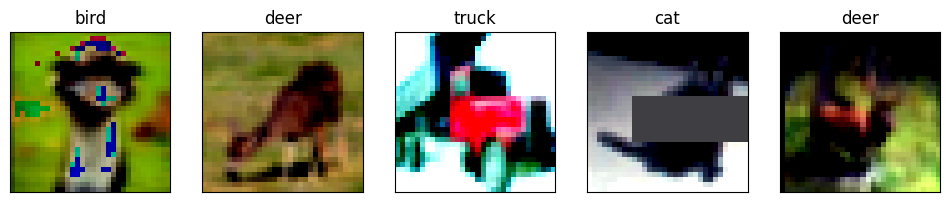

In [10]:
cifar10.show_sample_images()

## The Model

In [11]:
from models.ViT_Conv import ViT

#load VIT model
# net = ViT(image_size=32, patch_size=2, num_classes=10, dim=128, depth=4, heads=8, mlp_dim=128, pool = 'cls', channels = 3, dim_head = 64, dropout = 0., emb_dropout = 0)
net = ViT()


# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


## Model Summary

In [12]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              GELU-2           [-1, 32, 32, 32]               0
            Conv2d-3          [-1, 256, 16, 16]          33,024
AddPositionEmbedding-4          [-1, 256, 16, 16]               0
           Dropout-5          [-1, 256, 16, 16]               0
           Flatten-6             [-1, 256, 256]               0
           Dropout-7             [-1, 257, 256]               0
         LayerNorm-8             [-1, 257, 256]             512
            Linear-9             [-1, 257, 192]          49,152
          Softmax-10          [-1, 8, 257, 257]               0
           Linear-11             [-1, 257, 256]          16,640
          Dropout-12             [-1, 257, 256]               0
  

In [13]:
from main import trainTransformer

model, training_acc, training_loss, testing_acc, testing_loss = trainTransformer(net, trainloader,
                    testloader, epochs = 25, lr_max = 0.005,
                    clip_norm = True, scheduler_flag = True)

VIT: Epoch: 0 |  Train Acc: 0.2451,  Test Acc: 0.4216,  Time: 75.1,  lr: 0.000500
VIT: Epoch: 1 |  Train Acc: 0.3979,  Test Acc: 0.4771,  Time: 72.7,  lr: 0.001000
VIT: Epoch: 2 |  Train Acc: 0.4450,  Test Acc: 0.5085,  Time: 73.1,  lr: 0.001500
VIT: Epoch: 3 |  Train Acc: 0.4687,  Test Acc: 0.5239,  Time: 73.7,  lr: 0.002000
VIT: Epoch: 4 |  Train Acc: 0.4765,  Test Acc: 0.5043,  Time: 73.1,  lr: 0.002500
VIT: Epoch: 5 |  Train Acc: 0.4744,  Test Acc: 0.5383,  Time: 73.0,  lr: 0.003000
VIT: Epoch: 6 |  Train Acc: 0.4814,  Test Acc: 0.5297,  Time: 72.7,  lr: 0.003500
VIT: Epoch: 7 |  Train Acc: 0.4967,  Test Acc: 0.5713,  Time: 72.8,  lr: 0.004000
VIT: Epoch: 8 |  Train Acc: 0.5296,  Test Acc: 0.5893,  Time: 73.2,  lr: 0.004500
VIT: Epoch: 9 |  Train Acc: 0.5563,  Test Acc: 0.6319,  Time: 72.7,  lr: 0.005000
VIT: Epoch: 10 |  Train Acc: 0.5863,  Test Acc: 0.6229,  Time: 73.1,  lr: 0.004525
VIT: Epoch: 11 |  Train Acc: 0.6168,  Test Acc: 0.6503,  Time: 72.9,  lr: 0.004050
VIT: Epoch: 12